In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import requests
import seaborn as sns
sns.set()
from operator import itemgetter
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)


indicEndpoint = "https://ghoapi.azureedge.net/api/Indicator"
indicators = pd.read_json(indicEndpoint, lines = False)
indicators
indic = pd.json_normalize(indicators['value'])
indic

In [2]:
codes = ["WHOSIS_000002","BP_06","GHED_CHE_pc_US_SHA2011","NCD_GLUC_01", "UHC_INDEX_REPORTED","HWF_0001",
        "MDG_0000000020","NCD_BMI_18C","NCD_BMI_25C","NCD_BMI_MINUS2C","NCD_BMI_PLUS2C", "NCD_PAC",
        "NUTSTUNTINGPREV",'NCD_BMI_PLUS1C',"SA_0000001400","SDGPM25","WHS3_53","WHS3_62",
        "WSH_SANITATION_BASIC","WSH_WATER_BASIC","NCD_CHOL_MEANNONHDL_A", "IHRSPAR_CAPACITY04"]

def scrape_api (indicator):
    url = f"https://ghoapi.azureedge.net/api/{indicator}?$filter=SpatialDimType%20eq%20'COUNTRY'%20and%20date(TimeDimensionBegin)%20ge%202011-01-01%20and%20date(TimeDimensionBegin)%20lt%202021-01-01&$select=IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,TimeDim,NumericValue"
    indicator = pd.read_json(url,lines = False)
    df = pd.json_normalize(indicator['value'])
    return df

#with pd.ExcelWriter("/Users/test/Desktop/Data Science/who_data.xlsx") as writer:
with pd.ExcelWriter("who_data.xlsx") as writer:
    for i in codes:
        scrape_api(i).to_excel(writer, sheet_name = i)
        
indicEndpoint = "https://ghoapi.azureedge.net/api/Indicator"     
#with pd.ExcelWriter("/Users/test/Desktop/Data Science/indicators.xlsx") as writer:
with pd.ExcelWriter("indicators.xlsx") as writer:
    indicator = pd.read_json(indicEndpoint,lines = False)
    indic = pd.json_normalize(indicator['value'])
    indic.to_excel(writer, sheet_name = "indicators")

In [3]:
who = pd.read_excel("who_data.xlsx", sheet_name = None)
who

{'WHOSIS_000002':       Unnamed: 0  IndicatorCode SpatialDimType SpatialDim TimeDimType  \
 0              0  WHOSIS_000002        COUNTRY        AFG        YEAR   
 1              1  WHOSIS_000002        COUNTRY        AFG        YEAR   
 2              2  WHOSIS_000002        COUNTRY        AFG        YEAR   
 3              3  WHOSIS_000002        COUNTRY        AFG        YEAR   
 4              4  WHOSIS_000002        COUNTRY        AFG        YEAR   
 ...          ...            ...            ...        ...         ...   
 1093        1093  WHOSIS_000002        COUNTRY        ZWE        YEAR   
 1094        1094  WHOSIS_000002        COUNTRY        ZWE        YEAR   
 1095        1095  WHOSIS_000002        COUNTRY        ZWE        YEAR   
 1096        1096  WHOSIS_000002        COUNTRY        ZWE        YEAR   
 1097        1097  WHOSIS_000002        COUNTRY        ZWE        YEAR   
 
       TimeDim  NumericValue  
 0        2015      52.78430  
 1        2019      54.73407  


In [4]:
indic = pd.read_excel("indicators.xlsx")

In [142]:
indic[indic['IndicatorName'].str.contains ("Food Safety")]

Unnamed: 0       IndicatorCode IndicatorName Language
2364        2364  IHRSPAR_CAPACITY04   Food Safety       EN

In [6]:
def map_keys(key):
    for code in indic.IndicatorCode:
        if code== key:
            key=indic.loc[indic.IndicatorCode == key, 'IndicatorName'].iloc[0]
        else:
            continue
        return key

In [7]:
key = map_keys("BP_06")
print(key)

Mean systolic blood pressure (age-standardized estimate)


In [8]:
filtered = {(map_keys(key)):(value.groupby('SpatialDim')['SpatialDim','NumericValue'].median() ) for key,value in who.items()}
filtered
        

<ipython-input-8-62ceae30aa66>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filtered = {(map_keys(key)):(value.groupby('SpatialDim')['SpatialDim','NumericValue'].median() ) for key,value in who.items()}


{'Healthy life expectancy (HALE) at birth (years)':             NumericValue
 SpatialDim              
 AFG            52.968675
 AGO            54.251690
 ALB            69.050420
 ARE            65.781300
 ARG            66.992410
 ...                  ...
 WSM            62.012915
 YEM            58.051150
 ZAF            55.044275
 ZMB            53.513665
 ZWE            51.898120
 
 [183 rows x 1 columns],
 'Mean systolic blood pressure (age-standardized estimate)':             NumericValue
 SpatialDim              
 AFG               125.65
 AGO               129.65
 ALB               132.30
 AND               122.40
 ARE               123.05
 ...                  ...
 WSM               127.80
 YEM               127.55
 ZAF               125.60
 ZMB               130.85
 ZWE               128.20
 
 [195 rows x 1 columns],
 'Current health expenditure (CHE) per capita in US$':             NumericValue
 SpatialDim              
 AFG               56.970
 AGO              118.220
 

In [9]:
for key,value in filtered.items():
    value.rename(columns = {'NumericValue':key},inplace = True)

In [10]:
filtered

{'Healthy life expectancy (HALE) at birth (years)':             Healthy life expectancy (HALE) at birth (years)
 SpatialDim                                                 
 AFG                                               52.968675
 AGO                                               54.251690
 ALB                                               69.050420
 ARE                                               65.781300
 ARG                                               66.992410
 ...                                                     ...
 WSM                                               62.012915
 YEM                                               58.051150
 ZAF                                               55.044275
 ZMB                                               53.513665
 ZWE                                               51.898120
 
 [183 rows x 1 columns],
 'Mean systolic blood pressure (age-standardized estimate)':             Mean systolic blood pressure (age-standardized estimate)

other indicators to include:
 **hiv by country - sep csv**, glucose/diabetes, **population**, **literacy**, **gdp**, **'Infants exclusively breastfed for the first six months of life (%)',,** **Proportion of population below the international poverty line****
            
             ('Hospital beds (per 10 000 population)', 110),


Done:
('Overweight prevalence in children aged <five years (%)', 44),

In [11]:
count_countries = {}
for key, value in filtered.items():
    count_countries.update({key:int(value.count())})

count_countries

{'Healthy life expectancy (HALE) at birth (years)': 183,
 'Mean systolic blood pressure (age-standardized estimate)': 191,
 'Current health expenditure (CHE) per capita in US$': 192,
 'Mean fasting blood glucose (mmol/l) (age-standardized estimate)': 192,
 'UHC index of essential service coverage': 183,
 'Medical doctors (per 10,000)': 189,
 'Incidence of tuberculosis (per 100 000 population per year)': 194,
 'Prevalence of underweight among adults, BMI < 18 (crude estimate) (%)': 191,
 'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)': 191,
 'Prevalence of thinness among children and adolescents, BMI < -2 standard deviations below the median (crude estimate) (%)': 191,
 'Prevalence of obesity among children and adolescents, BMI > +2 standard deviations above the median (crude estimate) (%)': 191,
 'Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%)': 161,
 'Stunting prevalence among children under 5 years of 

In [12]:
OrderedDict(sorted(count_countries.items(), key=lambda t: t[1]))

OrderedDict([('Stunting prevalence among children under 5 years of age (%)',
              155),
             ('Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%)',
              161),
             ('Mumps - number of reported cases', 171),
             ('Healthy life expectancy (HALE) at birth (years)', 183),
             ('UHC index of essential service coverage', 183),
             ('Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)',
              188),
             ('Medical doctors (per 10,000)', 189),
             ('Mean systolic blood pressure (age-standardized estimate)', 191),
             ('Prevalence of underweight among adults, BMI < 18 (crude estimate) (%)',
              191),
             ('Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)',
              191),
             ('Prevalence of thinness among children and adolescents, BMI < -2 standard deviations below the med

In [13]:
df = filtered.pop('Healthy life expectancy (HALE) at birth (years)')

In [14]:

for key,value in filtered.items():
    df =  df.merge(right = value, on = 'SpatialDim', how = 'left')
df
    

Healthy life expectancy (HALE) at birth (years)  \
SpatialDim                                                    
AFG                                               52.968675   
AGO                                               54.251690   
ALB                                               69.050420   
ARE                                               65.781300   
ARG                                               66.992410   
...                                                     ...   
WSM                                               62.012915   
YEM                                               58.051150   
ZAF                                               55.044275   
ZMB                                               53.513665   
ZWE                                               51.898120   

            Mean systolic blood pressure (age-standardized estimate)  \
SpatialDim                                                             
AFG                                                           125.65   
AGO                                                           129.65   
ALB                                                           132.30   
ARE                                                           123.05   
ARG                                                           124.35   
...                                                              ...   
WSM                                                           127.80   
YEM                                                           127.55   
ZAF                                                           125.60   
ZMB                                                           130.85   
ZWE                                                           128.20   

            Current health expenditure (CHE) per capita in US$  \
SpatialDim                                                       
AFG                                                     56.970   
AGO                                                    118.220   
ALB                                                    220.000   
ARE                                                   1481.175   
ARG                                                   1327.320   
...                                                        ...   
WSM                                                    227.200   
YEM                                                     75.140   
ZAF                                                    517.875   
ZMB                                                     67.505   
ZWE                                                    110.215   

            Mean fasting blood glucose (mmol/l) (age-standardized estimate)  \
SpatialDim                                                                    
AFG                                                                5.334970   
AGO                                                                5.566305   
ALB                                                                5.043375   
ARE                                                                5.906825   
ARG                                                                5.409280   
...                                                                     ...   
WSM                                                                6.639530   
YEM                                                                5.294490   
ZAF                                                                5.833110   
ZMB                                                                5.112960   
ZWE                                                                5.090515   

            UHC index of essential service coverage  \
SpatialDim                                            
AFG                                            35.5   
AGO                                            39.0   
ALB                                            58.5   
ARE                                            74.0   
ARG                                   

In [15]:
df.reset_index(inplace = True)
df.rename(columns = {'SpatialDim': 'Country','Proportion of population below the international poverty line of US$1.90 per day (%)':'% population below the international poverty line',
                    'Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)':'% overweight among adults, BMI &GreaterEqual; 25',
                    'Prevalence of thinness among children and adolescents, BMI < -2 standard deviations below the median (crude estimate) (%)':
                    '% thinness among children and adolescents, BMI < -2 st.d',
                    'Prevalence of obesity among children and adolescents, BMI > +2 standard deviations above the median (crude estimate) (%)':
                    '% obesity among children and adolescents, BMI > +2 st.d ',
                    'Prevalence of overweight among children and adolescents, BMI > +1 standard deviations above the median (crude estimate) (%)':
                    '% overweight among children and adolescents, BMI > +1 st.d','Mean systolic blood pressure (age-standardized estimate)':
                    'Mean systolic blood pressure','Mean fasting blood glucose (mmol/l) (age-standardized estimate)':
                    'Mean fasting blood glucose (mmol/l)','Prevalence of underweight among adults, BMI < 18 (crude estimate) (%)':
                    '% underweight among adults, BMI < 18','Prevalence of insufficient physical activity among adults aged 18+ years (crude estimate) (%)':
                    '% insufficient physical activity among adults 18+','Alcohol, average daily intake in grams among drinkers with 95%CI':
                    'Alcohol, avg daily intake among drinkers,g. (95%CI)'},inplace = True)
df

Country  Healthy life expectancy (HALE) at birth (years)  \
0       AFG                                        52.968675   
1       AGO                                        54.251690   
2       ALB                                        69.050420   
3       ARE                                        65.781300   
4       ARG                                        66.992410   
..      ...                                              ...   
178     WSM                                        62.012915   
179     YEM                                        58.051150   
180     ZAF                                        55.044275   
181     ZMB                                        53.513665   
182     ZWE                                        51.898120   

     Mean systolic blood pressure  \
0                          125.65   
1                          129.65   
2                          132.30   
3                          123.05   
4                          124.35   
..                            ...   
178                        127.80   
179                        127.55   
180                        125.60   
181                        130.85   
182                        128.20   

     Current health expenditure (CHE) per capita in US$  \
0                                                56.970   
1                                               118.220   
2                                               220.000   
3                                              1481.175   
4                                              1327.320   
..                                                  ...   
178                                             227.200   
179                                              75.140   
180                                             517.875   
181                                              67.505   
182                                             110.215   

     Mean fasting blood glucose (mmol/l)  \
0                               5.334970   
1                               5.566305   
2                               5.043375   
3                               5.906825   
4                               5.409280   
..                                   ...   
178                             6.639530   
179                             5.294490   
180                             5.833110   
181                             5.112960   
182                             5.090515   

     UHC index of essential service coverage  Medical doctors (per 10,000)  \
0                                       35.5                        2.8140   
1                                       39.0                        2.1460   
2                                       58.5                       12.7280   
3                                       74.0                       21.0320   
4                                       76.0                       39.9005   
..                                       ...                           ...   
178                                     58.0                        4.1345   
179                                     41.0                        5.2510   
180                                     69.0                        7.6750   
181                                     53.5                        0.9250   
182                                     54.0                        1.5140   

     Incidence of tuberculosis (per 100 000 population per year)  \
0                                                         189.00   
1                                                         366.00   
2                                                          17.00   
3                                                           0.98   
4                                                          27.00   
..                                                           ...   
178                                                        12.00   
179                                                        48.00   
180

In [16]:
def max_year(df, country):
    df = df.loc[df.Code == country]
    return df.Year.max() 
def filter_year(df,country):
    index = df.index[(df.Code == country)& (df.Year==max_year(df,country))].tolist()
    if index:
        return df.at[index[0],'Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Rate)'] 

In [17]:
hiv = pd.read_csv('HIV Rate GHDX.csv')

filter_year(hiv,"AUS")

0.058242962999999995

In [18]:
df['HIV Rate'] = df['Country'].map(lambda x: filter_year(hiv,x))

In [19]:
country_convert = pd.read_csv('country-names-cross-ref.csv',index_col=False,squeeze = False,encoding='mac_roman',names=['alt_name','country'], dtype = 'str').apply(lambda x: x.astype(str).str.lower())

country_convert

alt_name         country
0                       aland  √öland islands
1                  ahvenanmaa  √öland islands
2                      aaland  √öland islands
3                     alandia  √öland islands
4               iso 3166-1:ax  √öland islands
...                       ...             ...
7076  health care in zimbabwe        zimbabwe
7077     republic of zimbabwe        zimbabwe
7078      cuisine of zimbabwe        zimbabwe
7079    etymology of zimbabwe        zimbabwe
7080                 zimbobwe        zimbabwe

[7081 rows x 2 columns]

In [20]:
def map_value(frame,column,state,feature):
 
    frame[column]=frame[column].str.lower()
    
    
    if state.lower() in frame.to_numpy():
        index = frame.index[frame[column]==state.lower()].tolist()
        return frame.at[index[0], feature]
        
    elif state.lower() in country_convert.to_numpy():
            #print(country)
            check = country_convert[(country_convert.alt_name.str.contains(state.lower()))|(country_convert.country.str.contains(state.lower()))]
             #(country_convert['country'] ==country.lower())]
            #print(check)
            #check = country_convert[(country_convert['country']==country.lower()) | 
            #(country_convert['alt_name']==country.lower())].stack()
            
            for i in check.to_numpy():
                
                if i[0] in frame[column].to_numpy() or i[1] in frame[column].to_numpy():
                    df2 = frame.replace( to_replace ={i[0]:state, i[1]:state})
                    index = df2.index[df2[column]==state].tolist()
                    return df2.at[index[0], feature]
                
    None

In [21]:
tobacco = pd.read_csv('tobacco atlas.csv')
df['Tobacco Use'] = df['Country'].map(lambda x: map_value(tobacco,'ISO3 CODE',x,"Cigarette consumption"))
df[['Country','Tobacco Use']]

Country  Tobacco Use
0       AFG   311.602536
1       AGO   340.187348
2       ALB  2491.599232
3       ARE   748.454115
4       ARG  1176.133082
..      ...          ...
178     WSM  1470.648264
179     YEM   423.849876
180     ZAF   509.554347
181     ZMB   145.424073
182     ZWE   122.857035

[183 rows x 2 columns]

    df[df['Tobacco Use'].isnull()]

In [22]:
inc_group = pd.read_csv('WorldBank Income Groups.csv')
def map_country(code):
    for country in inc_group.Code:
        if code== country:
            code=inc_group.loc[inc_group.Code == code, 'Economy'].iloc[0]
        else:
            continue
        return code
map_country('AGO')

'Angola'

In [23]:
df['Country'] = df.Country.map(lambda x: map_country(x))
df

Country  Healthy life expectancy (HALE) at birth (years)  \
0             Afghanistan                                        52.968675   
1                  Angola                                        54.251690   
2                 Albania                                        69.050420   
3    United Arab Emirates                                        65.781300   
4               Argentina                                        66.992410   
..                    ...                                              ...   
178                 Samoa                                        62.012915   
179           Yemen, Rep.                                        58.051150   
180          South Africa                                        55.044275   
181                Zambia                                        53.513665   
182              Zimbabwe                                        51.898120   

     Mean systolic blood pressure  \
0                          125.65   
1                          129.65   
2                          132.30   
3                          123.05   
4                          124.35   
..                            ...   
178                        127.80   
179                        127.55   
180                        125.60   
181                        130.85   
182                        128.20   

     Current health expenditure (CHE) per capita in US$  \
0                                                56.970   
1                                               118.220   
2                                               220.000   
3                                              1481.175   
4                                              1327.320   
..                                                  ...   
178                                             227.200   
179                                              75.140   
180                                             517.875   
181                                              67.505   
182                                             110.215   

     Mean fasting blood glucose (mmol/l)  \
0                               5.334970   
1                               5.566305   
2                               5.043375   
3                               5.906825   
4                               5.409280   
..                                   ...   
178                             6.639530   
179                             5.294490   
180                             5.833110   
181                             5.112960   
182                             5.090515   

     UHC index of essential service coverage  Medical doctors (per 10,000)  \
0                                       35.5                        2.8140   
1                                       39.0                        2.1460   
2                                       58.5                       12.7280   
3                                       74.0                       21.0320   
4                                       76.0                       39.9005   
..                                       ...                           ...   
178                                     58.0                        4.1345   
179                                     41.0                        5.2510   
180                                     69.0                        7.6750   
181                                     53.5                        0.9250   
182                                     54.0                        1.5140   

     Incidence of tuberculosis (per 100 000 population per year)  \
0                                                         189.00   
1                                                         366.00   
2                                                          17.00   
3                                                           0.98   
4                                                          27.00   
..                                                   

In [24]:
country_convert[(country_convert.alt_name.str.contains("Ivory".lower()))|(country_convert.country.str.contains("Côte d'Ivoire".lower()))]

alt_name        country
903                   republic of cote d'ivoire  côte d'ivoire
904                              c√¥te-d'ivoire  côte d'ivoire
905                               iso 3166-1:ci  côte d'ivoire
906                              c√¥te d'ivoire  côte d'ivoire
907                               cote d'ivoire  côte d'ivoire
..                                          ...            ...
951                              c√¥te d'ivoire  côte d'ivoire
952                               c√¥te divoire  côte d'ivoire
953                             c√¥te d' ivoire  côte d'ivoire
954  administrative divisions of c√¥te d'ivoire  côte d'ivoire
955                 cote d'ivoire (ivory coast)  côte d'ivoire

[53 rows x 2 columns]

def count_finder(country):
    name = country_convert.index[country_convert['alt_name'].str.lower()==country.lower()].tolist()
    return country_convert.at[name[0],'country']
  
   
            
            
count_finder("Ivory coast")

In [25]:
pop_pov = pd.read_csv('poverty+population.csv')
df['Poverty'] = df.Country.map(lambda x: map_value(pop_pov,'country',x,"pop2021"))
df[df['Poverty'].isnull()]

Country  \
3              United Arab Emirates   
6               Antigua and Barbuda   
16                          Bahrain   
17                     Bahamas, The   
23                         Barbados   
..                              ...   
151                        Suriname   
157            Syrian Arab Republic   
165             Trinidad and Tobago   
174  St. Vincent and the Grenadines   
175                   Venezuela, RB   

     Healthy life expectancy (HALE) at birth (years)  \
3                                          65.781300   
6                                          66.894090   
16                                         65.926475   
17                                         64.264330   
23                                         67.097845   
..                                               ...   
151                                        62.786250   
157                                        60.648095   
165                                        65.708545   
174                                        63.740475   
175                                        64.768175   

     Mean systolic blood pressure  \
3                          123.05   
6                          125.85   
16                         123.85   
17                         125.15   
23                         127.00   
..                            ...   
151                        125.30   
157                        127.45   
165                        125.85   
174                        125.65   
175                        122.25   

     Current health expenditure (CHE) per capita in US$  \
3                                              1481.175   
6                                               766.345   
16                                             1082.505   
17                                             1653.060   
23                                             1152.785   
..                                                  ...   
151                                             436.925   
157                                              75.270   
165                                            1080.480   
174                                             296.885   
175                                             680.650   

     Mean fasting blood glucose (mmol/l)  \
3                               5.906825   
6                               5.827215   
16                              6.058390   
17                              5.877460   
23                              5.758470   
..                                   ...   
151                             5.563290   
157                             5.463145   
165                             5.841455   
174                             5.469780   
175                             4.870550   

     UHC index of essential service coverage  Medical doctors (per 10,000)  \
3                                       74.0                       21.0320   
6                                       73.0                       27.6730   
16                                      76.0                        9.5360   
17                                      74.0                       21.2340   
23                                      76.5                       24.8780   
..                                       ...                           ...   
151                                     70.5                       10.8875   
157                                     59.5                       14.1935   
165                                     73.0                       33.6460   
174                                     69.0                        9.4100   
175                                     73.5                       17.3000   

     Incidence of tuberculosis (per 100 000 population per year)  \
3                                                           0.98   
6                                                           3.80   
16                                                         15.

In [26]:
attributes = {'LiteracyWorldPopreview.csv': ['Literacy Rate','country','literacyRate'], 'Population+2020_UN.csv':['Population, 1000s','Country','2020'],
              "poverty+population.csv":['Poverty Rate','country','povertyRate'],
"Unemployment CIA WFB.csv":['Unemployment Rate',"name", "value"],
"GDP PPP CIA world factbook.csv": ["GDP PPP","name", "value"]}


In [27]:
new = pd.read_csv('Population+2020_UN.csv')
new

Country  \
0                                                          World   
1                                         More developed regions   
2                                         Less developed regions   
3                                      Least developed countries   
4    Less developed regions, excluding least developed countries   
..                                                           ...   
268                                                        Samoa   
269                                                      Tokelau   
270                                                        Tonga   
271                                                       Tuvalu   
272                                    Wallis and Futuna Islands   

                                                              Location Note  \
0                                                                World  NaN   
1                                               More developed regions    a   
2                                               Less developed regions    b   
3                                            Least developed countries    c   
4          Less developed regions, excluding least developed countries    d   
..                                                                 ...  ...   
268                                                              Samoa  NaN   
269                                                            Tokelau  NaN   
270                                                              Tonga  NaN   
271                                                             Tuvalu  NaN   
272                                          Wallis and Futuna Islands  NaN   

            2020  
0      7 795 482  
1      1 269 277  
2      6 526 205  
3      1 073 984  
4      5 452 221  
..           ...  
268          200  
269            1  
270          111  
271           11  
272           12  

[273 rows x 4 columns]

In [28]:
for k,v in attributes.items():
    feat = pd.read_csv(k)
    df[v[0]] = df['Country'].map(lambda x: map_value(feat,v[1],x,v[2]))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 31 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     183 non-null    object 
 1   Healthy life expectancy (HALE) at birth (years)                             183 non-null    float64
 2   Mean systolic blood pressure                                                181 non-null    float64
 3   Current health expenditure (CHE) per capita in US$                          181 non-null    float64
 4   Mean fasting blood glucose (mmol/l)                                         182 non-null    float64
 5   UHC index of essential service coverage                                     183 non-null    float64
 6   Medical doctors (per 10,000)                      

In [30]:
df['GDP PPP'] = df['GDP PPP'].str.replace('$','',regex = True)
df['GDP PPP'] = df['GDP PPP'].str.replace(',','')
df['GDP PPP']

0       78557000000 
1      212285000000 
2       39859000000 
3      655789000000 
4      991523000000 
           ...      
178      1285000000 
179     73630000000 
180    730913000000 
181     61985000000 
182     41533000000 
Name: GDP PPP, Length: 183, dtype: object

In [31]:
df['Population, 1000s']

0         38 055
1         32 827
2          2 942
3          9 813
4         45 510
         ...    
178          200
179       30 245
180       58 721
181       18 679
182       17 680
Name: Population, 1000s, Length: 183, dtype: object

In [32]:
df['Population, 1000s'] = df['Population, 1000s'].str.replace(' ','')
df = df.astype({'Population, 1000s':'float','GDP PPP':'float'},copy = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 31 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     183 non-null    object 
 1   Healthy life expectancy (HALE) at birth (years)                             183 non-null    float64
 2   Mean systolic blood pressure                                                181 non-null    float64
 3   Current health expenditure (CHE) per capita in US$                          181 non-null    float64
 4   Mean fasting blood glucose (mmol/l)                                         182 non-null    float64
 5   UHC index of essential service coverage                                     183 non-null    float64
 6   Medical doctors (per 10,000)                      

count_name = {'Brunei': 'Brunei Darussalam','Cape Verde': 'Cabo Verde','Egypt':'Egypt, Arab Rep.','Ivory Coast':"'Côte d'Ivoire'",
              'Gambia':'Gambia, The','Iran':'Iran, Islamic Rep.','Kyrgyzstan':'Kyrgyz Republic','Laos':'Lao PDR',
              'North Korea':"'Korea, Dem. People's Rep.'",'Russia':'Russian Federation','Sao Tome and Principe':"'São Tomé and Principe",
              'Syria':'Syrian Arab Republic','Venezuela':'Venezuela, RB','Yemen':'Yemen, Rep.'
 }

In [33]:
df.Country.nunique()

183

In [34]:
df.describe()

Healthy life expectancy (HALE) at birth (years)  \
count                                       183.000000   
mean                                         62.921383   
std                                           6.440725   
min                                          42.867880   
25%                                          57.586685   
50%                                          64.144465   
75%                                          67.768690   
max                                          73.855460   

       Mean systolic blood pressure  \
count                    181.000000   
mean                     126.474586   
std                        3.598675   
min                      115.250000   
25%                      123.850000   
50%                      126.800000   
75%                      129.350000   
max                      134.700000   

       Current health expenditure (CHE) per capita in US$  \
count                                          181.000000   
mean                                          1028.705331   
std                                           1770.722686   
min                                             18.940000   
25%                                             82.930000   
50%                                            308.200000   
75%                                            946.155000   
max                                           9411.105000   

       Mean fasting blood glucose (mmol/l)  \
count                           182.000000   
mean                              5.400205   
std                               0.477028   
min                               3.963420   
25%                               5.112885   
50%                               5.359880   
75%                               5.611320   
max                               7.182560   

       UHC index of essential service coverage  Medical doctors (per 10,000)  \
count                               183.000000                    179.000000   
mean                                 63.322404                     18.264598   
std                                  15.675360                     16.751844   
min                                  23.500000                      0.230000   
25%                                  49.750000                      3.394750   
50%                                  67.500000                     15.766500   
75%                                  75.750000                     28.389500   
max                                  88.500000                     78.097000   

       Incidence of tuberculosis (per 100 000 population per year)  \
count                                                   183.000000   
mean                                                    122.481858   
std                                                     164.162570   
min                                                       0.400000   
25%                                                      15.000000   
50%                                                      51.000000   
75%                                                     175.000000   
max                                                     988.000000   

       % underweight among adults, BMI < 18  \
count                            181.000000   
mean                               5.829834   
std                                5.314691   
min                                0.400000   
25%                                1.450000   
50%                                3.400000   
75%                               10.200000   
max                               24.300000   

       % overweight among adults, BMI &GreaterEqual; 25  \
count                                        181.000000   
mean                                          45.624033   
std                                           17.478876   
min                                           16.350000   
25%                                           26.500000   
50%                                  

Even though Food safety seems like a continuous category, in fact it takes on discrete values. We should investigate it further

In [144]:
df['Food Safety'].unique()

array([ 20.,  40.,  70., 100.,  80.,  60.,  nan,   0.,  30.,  50.])


# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset

dataframe = df
# split into input and output elements
X =  dataframe.iloc[:,2:-2]
y = dataframe.iloc[:, 1]
from sklearn.utils.multiclass import type_of_target
#type_of_target(y)
X
# evaluate each strategy on the dataset


results = []
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', KNeighborsRegressor())])
	# evaluate the model
	#cv = KFold(n_splits=10, shuffle = False)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=KFold(), n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()


In [35]:
df.set_index('Country',inplace = True)
df

Healthy life expectancy (HALE) at birth (years)  \
Country                                                                 
Afghanistan                                                 52.968675   
Angola                                                      54.251690   
Albania                                                     69.050420   
United Arab Emirates                                        65.781300   
Argentina                                                   66.992410   
...                                                               ...   
Samoa                                                       62.012915   
Yemen, Rep.                                                 58.051150   
South Africa                                                55.044275   
Zambia                                                      53.513665   
Zimbabwe                                                    51.898120   

                      Mean systolic blood pressure  \
Country                                              
Afghanistan                                 125.65   
Angola                                      129.65   
Albania                                     132.30   
United Arab Emirates                        123.05   
Argentina                                   124.35   
...                                            ...   
Samoa                                       127.80   
Yemen, Rep.                                 127.55   
South Africa                                125.60   
Zambia                                      130.85   
Zimbabwe                                    128.20   

                      Current health expenditure (CHE) per capita in US$  \
Country                                                                    
Afghanistan                                                       56.970   
Angola                                                           118.220   
Albania                                                          220.000   
United Arab Emirates                                            1481.175   
Argentina                                                       1327.320   
...                                                                  ...   
Samoa                                                            227.200   
Yemen, Rep.                                                       75.140   
South Africa                                                     517.875   
Zambia                                                            67.505   
Zimbabwe                                                         110.215   

                      Mean fasting blood glucose (mmol/l)  \
Country                                                     
Afghanistan                                      5.334970   
Angola                                           5.566305   
Albania                                          5.043375   
United Arab Emirates                             5.906825   
Argentina                                        5.409280   
...                                                   ...   
Samoa                                            6.639530   
Yemen, Rep.                                      5.294490   
South Africa                                     5.833110   
Zambia                                           5.112960   
Zimbabwe                                         5.090515   

                      UHC index of essential service coverage  \
Country                                                         
Afghanistan                                              35.5   
Angola                                                   39.0   
Albania                                                  58.5   
United Arab Emirates                                     74.0   
Argentina                                                76.0   
...                                                       ...   
Samoa                                                    58.0   
Y

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df2 = pd.DataFrame(scaler.fit_transform(df), columns = df.columns,index = df.index)
df2.iloc[:,1:]

    

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
df2 = df
X = df2.iloc[:,1:]

y = df2.iloc[:,0]
def split_scale(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    #scaler = StandardScaler()
    scaler = MinMaxScaler()
    X_train_scaler = scaler.fit(X_train)
    X_train_scaled = X_train_scaler.transform(X_train)
    X_test_scaled = X_train_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test
    
scaler_transformer  = FunctionTransformer(split_scale, validate = False, kw_args = {'y':df2.iloc[:,0]})
scaled = scaler_transformer.fit_transform(X,y)

0.77 accuracy with a standard deviation of 0.15


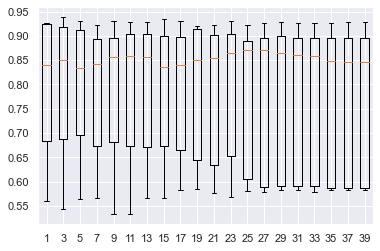

{1: 0.7868492483374521,
 3: 0.787807778600572,
 5: 0.7867461595897307,
 7: 0.7793810279567092,
 9: 0.7794607799050187,
 11: 0.7793599263413002,
 13: 0.7853903966844905,
 15: 0.7817354869490394,
 17: 0.7826190721887161,
 19: 0.7824422711158138,
 21: 0.7778081506448628,
 23: 0.7837433799046745,
 25: 0.7739729040628356,
 27: 0.7719008484977181,
 29: 0.7737871797983293,
 31: 0.7709107928024557,
 33: 0.769862992231279,
 35: 0.7678306000618841,
 37: 0.7672983734515507,
 39: 0.7672983734515507}

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
df2 = df
knni = KNNImputer()
#imp = IterativeImputer(max_iter=10, random_state=42)
X = df2.iloc[:,1:]

y = df2.iloc[:,0]
X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X,y)
#X_train_knn = knni.fit(X_train_scaled)
#X_train_knn = X_train
df_knn = pd.DataFrame(X_train_knn, columns=X.columns)
df_knn['target'] = y
#sns.pairplot(df_knn, hue='target')
score = []
dict_score = {}
strategies = range(1,41,2)
for i in strategies:
    pipe_knn = make_pipeline(KNNImputer(n_neighbors=i, weights = 'uniform'),
                            RandomForestRegressor(random_state = 42))
    
            
                            
    pipe_knn.fit(X_train_scaled, y_train)
    scores = cross_val_score(pipe_knn, X_test_scaled, y_test, cv=5, n_jobs=-1)
    score.append(scores)
    dict_score[i]=scores.mean()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
# plot model performance for comparison
pyplot.boxplot(score, labels=strategies )
#showmeans=True, meanline = True
pyplot.show()
#tested for neigbours in range(1,35,2), 3 has the highest accuracy
dict_score

In [ ]:
df

In [47]:
X = df.iloc[:,1:]
imputer = KNNImputer(n_neighbors =3)
columns = df.columns.to_list()
feat = pd.DataFrame(imputer.fit_transform(X),columns = columns[1:],index = df.index)
df_filled = pd.concat([df.iloc[:,0],feat],axis = 1)

In [48]:
df_filled[df_filled.isnull()].count()

Healthy life expectancy (HALE) at birth (years)       0
Mean systolic blood pressure                          0
Current health expenditure (CHE) per capita in US$    0
Mean fasting blood glucose (mmol/l)                   0
UHC index of essential service coverage               0
                                                     ..
Literacy Rate                                         0
Population, 1000s                                     0
Poverty Rate                                          0
Unemployment Rate                                     0
GDP PPP                                               0
Length: 30, dtype: int64

dataframe = df
# split into input and output elements
data = dataframe.values
y = data[:,1]

X_train, X_test, y_train, y_test = train_test_split(X_missing, y, random_state=13)
# define modeling pipeline
strategies = range(1,35,2)
model = RandomForestRegressor()
#imputer = KNNImputer(n_neighbors=i)
scores = []
for i in strategies:
    
    pipeline = make_pipeline(StandardScaler(),
                            KNNImputer(n_neighbors=i, weights = "uniform"),
                            RandomForestRegressor())
    pipeline.fit(X_train, y_train)
# define model evaluation
    cv = KFold(n_splits=10,  shuffle = False)
# evaluate model
    scores.append(cross_val_score(pipeline, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1))
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

sns.pairplot(df_filled).get_figure().savefig()

import pandas as pd
pip install datawig
import datawig

data = df

df_train, df_test = datawig.utils.random_split(data)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Pclass','SibSp','Parch'], # column(s) containing information about the column we want to impute
    output_column= 'Age', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

In [49]:
#pd.plotting.scatter_matrix(df_filled.iloc[:,0:35], figsize=(40,40), diagonal = 'kde');

In [50]:
from sklearn.feature_selection import SelectKBest,f_regression
X = df_filled.iloc[:,1:]
scaler = MinMaxScaler()
X_scaler = scaler.fit(X)
X_scaled = X_scaler.transform(X)
y = df_filled.iloc[:,0]

feat = SelectKBest(score_func = f_regression, k='all')
feat.fit(X_scaled,y)
 
features = X.columns
pvalues = dict(zip(features, feat.pvalues_))
feat_scores = dict(zip(features, feat.scores_))   
 
print(pvalues)
print(feat_scores)

{'Mean systolic blood pressure': 9.764355865385955e-12, 'Current health expenditure (CHE) per capita in US$': 7.035201766877119e-17, 'Mean fasting blood glucose (mmol/l)': 0.6633161465615542, 'UHC index of essential service coverage': 4.1176171754858674e-58, 'Medical doctors (per 10,000)': 2.643930555519647e-29, 'Incidence of tuberculosis (per 100 000 population per year)': 3.3373882339966455e-25, '% underweight among adults, BMI < 18': 6.616937839026918e-22, '% overweight among adults, BMI &GreaterEqual; 25': 2.044887082895814e-22, '% thinness among children and adolescents, BMI < -2 st.d': 6.689541606943941e-12, '% obesity among children and adolescents, BMI > +2 st.d ': 8.230968008281854e-12, '% insufficient physical activity among adults 18+': 2.3056763207793023e-12, 'Stunting prevalence among children under 5 years of age (%)': 6.043047287359974e-16, '% overweight among children and adolescents, BMI > +1 st.d': 1.7514328363355133e-15, 'Alcohol, recorded per capita (15+) consumptio

In [51]:
to_inv = [y.name]
to_inv

['Healthy life expectancy (HALE) at birth (years)']

In [52]:
to_inv = [y.name]
for key,value in pvalues.items():
  if value>0.05:
    to_inv.append(key)
to_inv
    

['Healthy life expectancy (HALE) at birth (years)',
 'Mean fasting blood glucose (mmol/l)',
 'Mumps - number of reported cases',
 'Poverty',
 'Population, 1000s']

/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


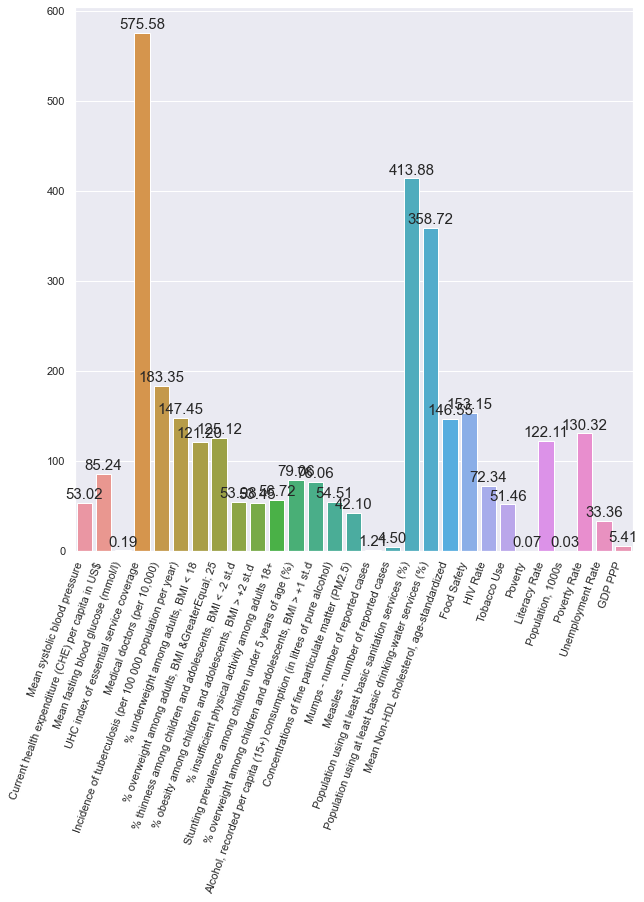

In [53]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 70,ha="right")
score_plot = sns.barplot([i for i in feat_scores.keys()],[i for i in feat_scores.values()])
for bar in score_plot.patches:
  score_plot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


In [54]:
import plotly.express as px
fig = px.scatter_matrix(df.loc[:,to_inv])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.update_layout(autosize=True)
fig.show()
#no strong non-linear relationships with targets for any of these features,we should remove them. 

In [82]:
df_filled.drop(labels = to_inv[1:],axis = 1,inplace = True)
df_filled

KeyError: "['Mean fasting blood glucose (mmol/l)' 'Mumps - number of reported cases'\n 'Poverty' 'Population, 1000s'] not found in axis"

In [56]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 26 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Healthy life expectancy (HALE) at birth (years)                             183 non-null    float64
 1   Mean systolic blood pressure                                                183 non-null    float64
 2   Current health expenditure (CHE) per capita in US$                          183 non-null    float64
 3   UHC index of essential service coverage                                     183 non-null    float64
 4   Medical doctors (per 10,000)                                                183 non-null    float64
 5   Incidence of tuberculosis (per 100 000 population per year)                 183 non-null    float64
 6   % underweight among adults, BMI < 18    

import plotly.express as px
fig1 = px.scatter_matrix(df_filled.iloc[:,0:8])
fig2 = px.scatter_matrix(df_filled.iloc[:,np.r_[0,9:16]])
fig3 = px.scatter_matrix(df_filled.iloc[:,np.r_[0,17:24]])
fig4 = px.scatter_matrix(df_filled.iloc[:,np.r_[0,25:30]])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.update_layout(autosize=True)
fig1.show()
fig2.show()
fig3.show()
fig4.show()

%matplotlib inline
import matplotlib.pyplot as plt
df_filled.hist(bins = 25, figsize=(40,25))
#save_fig("attribute_histogram_plots")
plt.show()

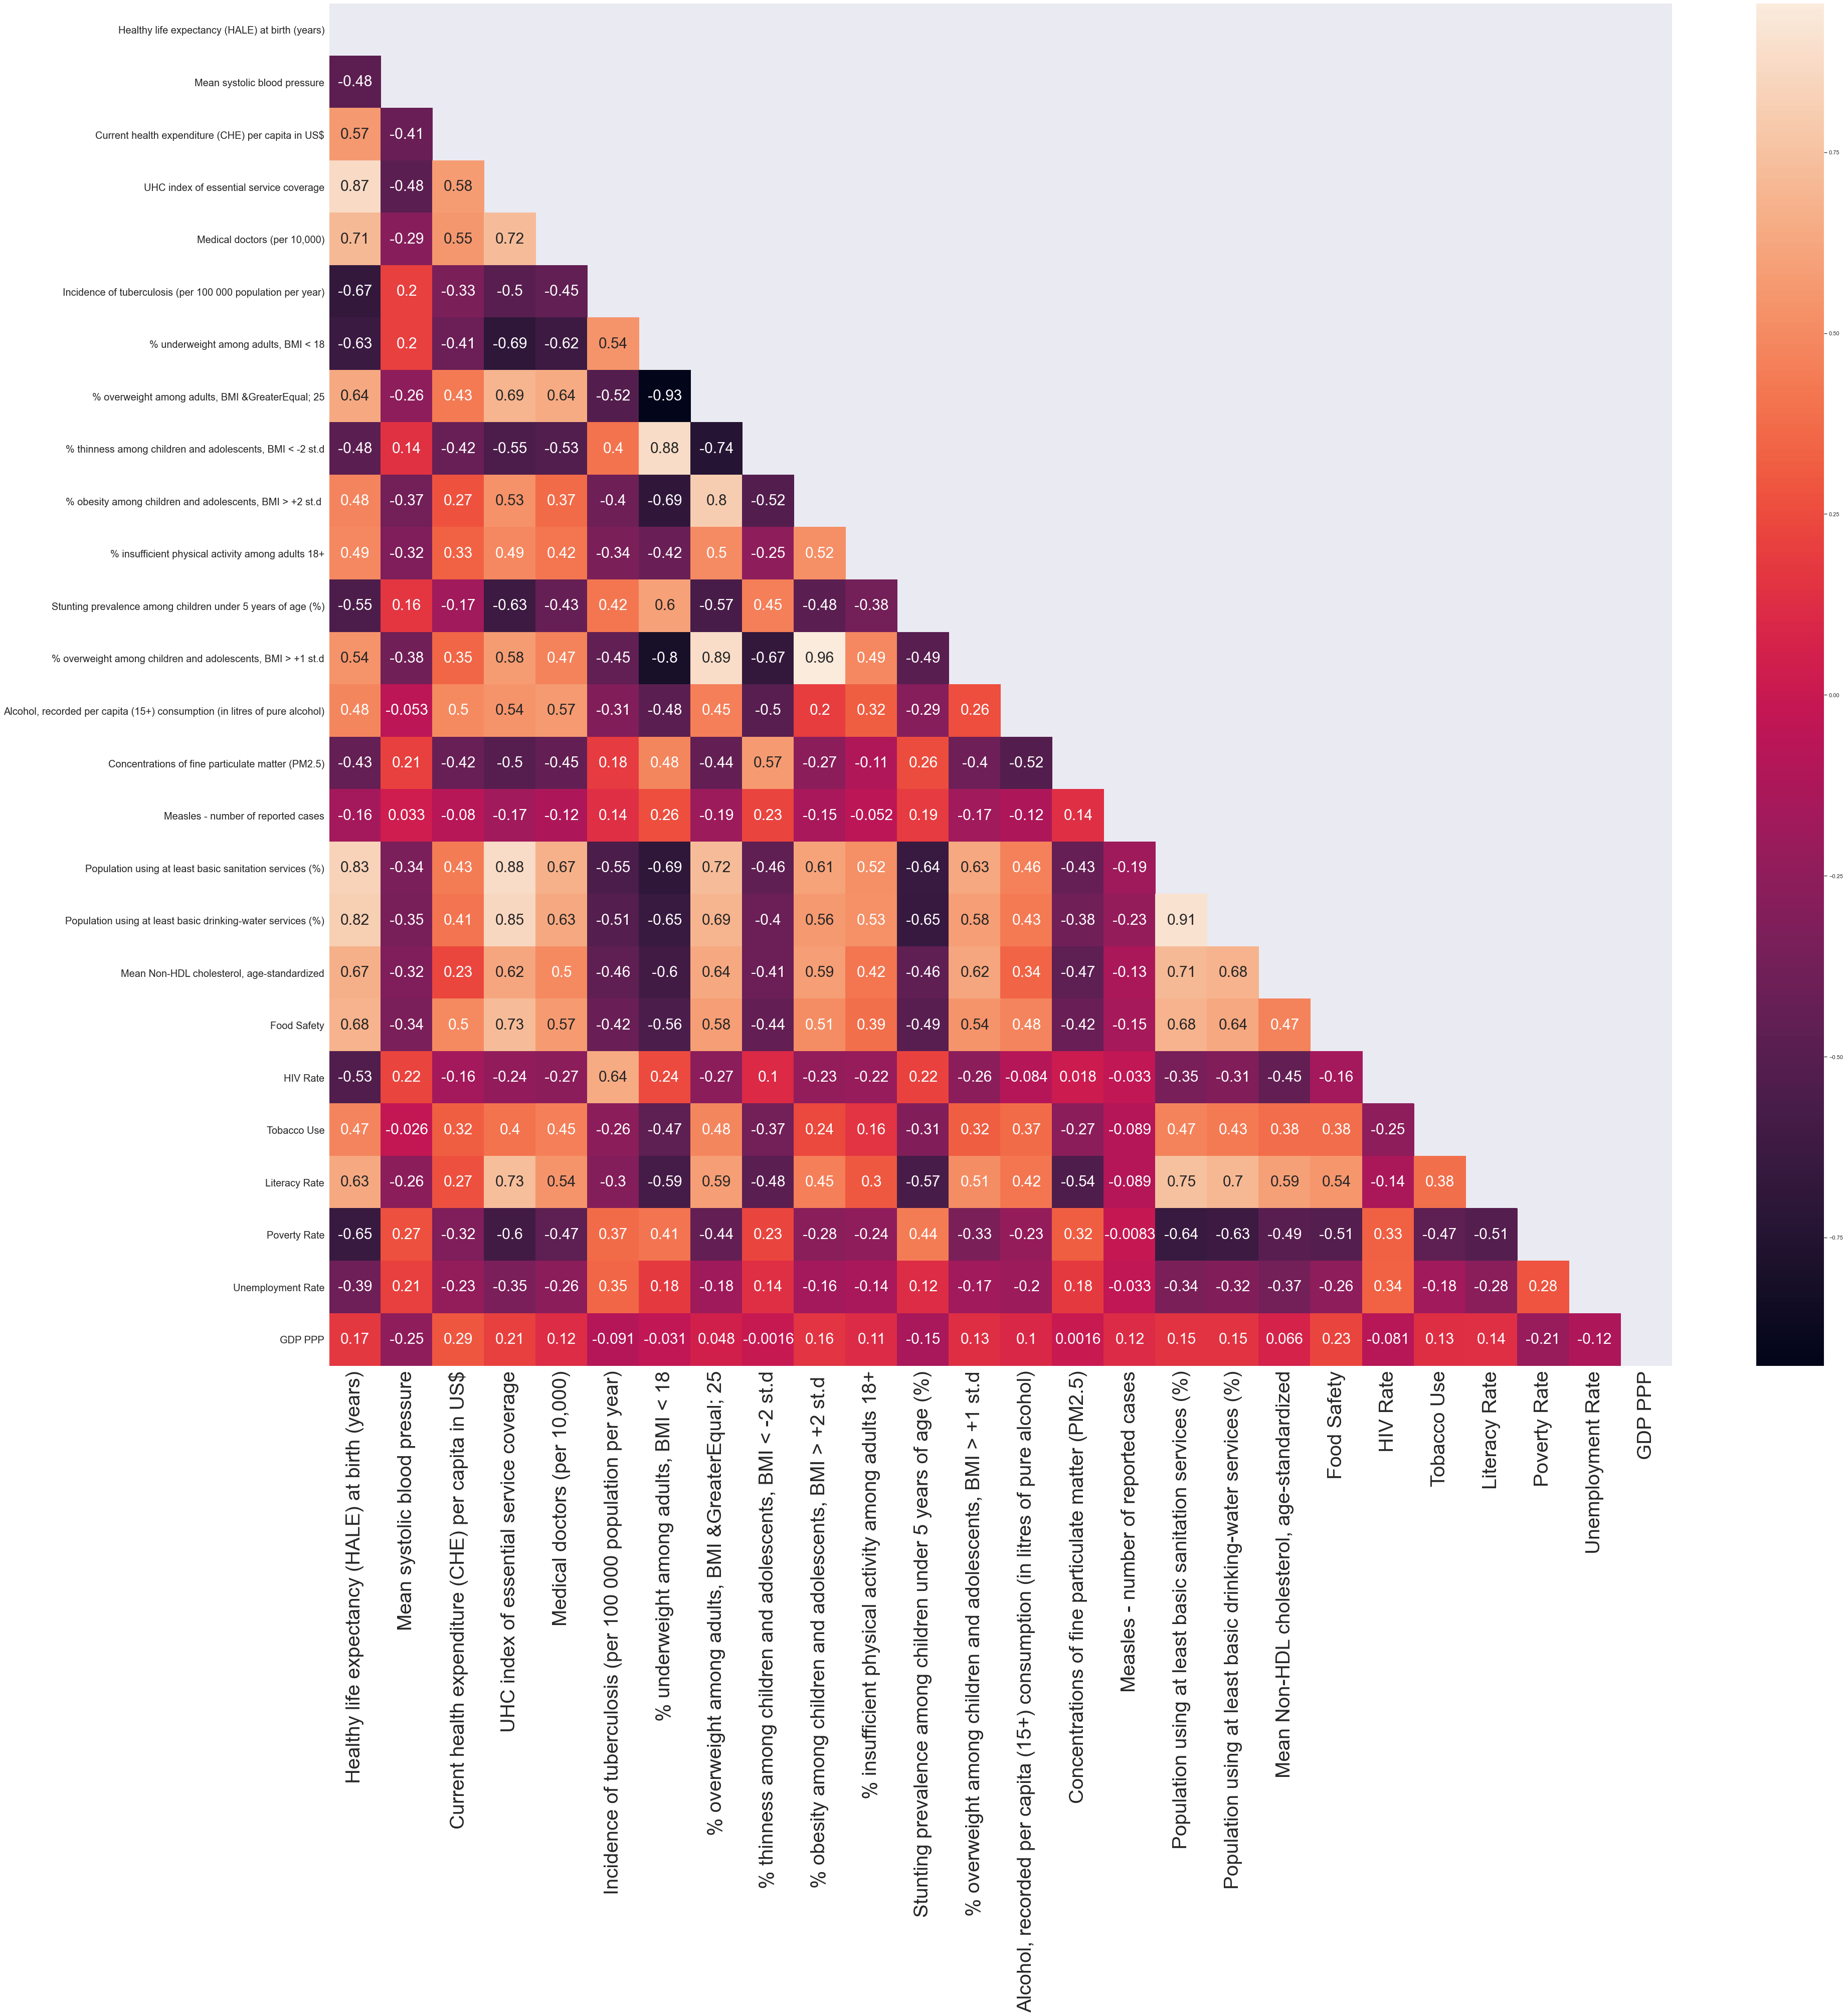

In [57]:
fig, ax = plt.subplots(figsize=(60,50))
abc = df_filled.corr()
mask = np.zeros_like(abc)
mask[np.triu_indices_from(mask)] = True
res = sns.heatmap(abc, annot=True,annot_kws={"size":30}, ax = ax, mask = mask)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 40)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 20);

#res.xaxis.set_label_position('top');

#sns.set(font_scale=2);


### from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_filled.iloc[:,1:]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif


Stratified split produces accuracy of about 79%, which is lower than train_test_split accuracy, and a higher RMSE
It was produced by adding  new categorical attribute (country income group that has values in the range of low-lower middle-upper middle-high income, which we removed from the final dataset for ease of handling

from sklearn.model_selection import StratifiedShuffleSplit
def strat_split_scale(df,imp_categ):
    split = StratifiedShuffleSplit(n_splits = 1,random_state=13, test_size = 0.25)
    #split.get_n_splits(df,imp_categ)
    for train_index, test_index in split.split(df,imp_categ):
        train_set, test_test = df.iloc[train_index],df.iloc[test_index]
       
    X_train, y_train  = train_set.iloc[:,1:-1],train_set.iloc[:,0] 
    X_test, y_test = test_set.iloc[:,1:-1],test_set.iloc[:,0] 
    scaler = MinMaxScaler()
    X_train_scaler = scaler.fit(X_train)
    X_train_scaled = X_train_scaler.transform(X_train)
    X_test_scaled = X_train_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

In [115]:
X = df_filled.iloc[:,1:]
y = df_filled.iloc[:,0]
X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X,y)
rf_reg = RandomForestRegressor(n_jobs = -1, oob_score = True, random_state = 42, n_estimators = 78)
rf_reg.fit(X_train_scaled, y_train)
rf_scores = cross_val_score(rf_reg, X_train_scaled, y_train,cv =3, scoring = 'r2')
rf_scores.mean()




0.7942703620811393

In [59]:
y_test.std()

7.221543666860875

In [117]:
from sklearn.linear_model import LinearRegression
X = df_filled.iloc[:,1:]
y = df_filled.iloc[:,0]
X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X,y)
lin_reg = LinearRegression().fit(X_train_scaled,y_train )
lin_reg_score = cross_val_score(lin_reg,X_train_scaled,y_train, cv = 3)
lin_reg_score.mean()
#y_pred = lin_reg.predict(X_test_scaled)
#print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
#print("R²: ", r2_score(y_test, y_pred))

0.8643941715600366

In [86]:
from sklearn.svm import SVR
X = df_filled.iloc[:,1:]
y = df_filled.iloc[:,0]
X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X,y)
regr = SVR(kernel = 'linear')
regr.fit(X_train_scaled,y_train )
y_pred = regr.predict(X_test_scaled)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²: ", r2_score(y_test, y_pred))

RMSE:  2.8979372658569824
R²:  0.8353873547202173


In [62]:
from sklearn.svm import SVR
X = df_filled.iloc[:,1:]
y = df_filled.iloc[:,0]
X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X,y)
regr = SVR(C= 1, gamma= 'scale',kernel='linear')
regr.fit(X_train_scaled,y_train )
y_pred = regr.predict(X_test_scaled)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²: ", r2_score(y_test, y_pred))

RMSE:  2.875270374102398
R²:  0.837952396143022


In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'gamma': ['scale','auto'],'kernel':('linear', 'rbf')}]
svr = SVR()
gridsearch = GridSearchCV(svr, param_grid, cv = 5, return_train_score = True)
gridsearch.fit(X_train_scaled, y_train)
gridsearch.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [93]:
regr = SVR(kernel = 'linear', gamma = 'scale')
regr.fit(X_train_scaled,y_train )
y_pred = regr.predict(X_test_scaled)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²: ", r2_score(y_test, y_pred))

RMSE:  2.8979372658569824
R²:  0.8353873547202173


In [88]:
param_grid = [
    {'fit_intercept': [True,False]}]
lin = LinearRegression()
gridsearch = GridSearchCV(lin, param_grid, cv = 5, return_train_score = True)
gridsearch.fit(X_train_scaled, y_train)
gridsearch.best_params_


{'fit_intercept': True}

In [89]:
max_features = list((range(X.shape[1]-1)))
n_estimators = list(range(3,30,2))

In [98]:

from sklearn.model_selection import RandomizedSearchCV
n_estimators = list
param_grid = [
{'n_estimators': range(1,300) , 'bootstrap':[True,False]}]

randfor = RandomForestRegressor()
gridsearch = RandomizedSearchCV(randfor, param_grid, n_iter = 10,cv = 3, random_state = 42, return_train_score = True)
gridsearch.fit(X_train_scaled, y_train)
gridsearch.best_params_




{'n_estimators': 78, 'bootstrap': True}

In [67]:
def plt_reg(Y_test, Y_pred, title="", axis_label=""):
  y_residual = np.abs(Y_test-Y_pred)
  fig, ax = plt.subplots(figsize = (20,10))
  scatter = ax.scatter(x=Y_test, y=Y_pred, c=y_residual, marker="o", s = 100, alpha = 0.8)
  ax.set_xlabel("Actual %s"%axis_label); ax.set_ylabel("Predicted %s"%axis_label)
  ax.set_title(title)
  
  cbar = plt.colorbar(scatter)
  cbar.ax.set_ylabel("Residual", rotation=90)
  ax.plot([np.min(Y_test), np.max(Y_test)], [np.min(Y_test), np.max(Y_test)], "b--", alpha = 0.75, linewidth=4)

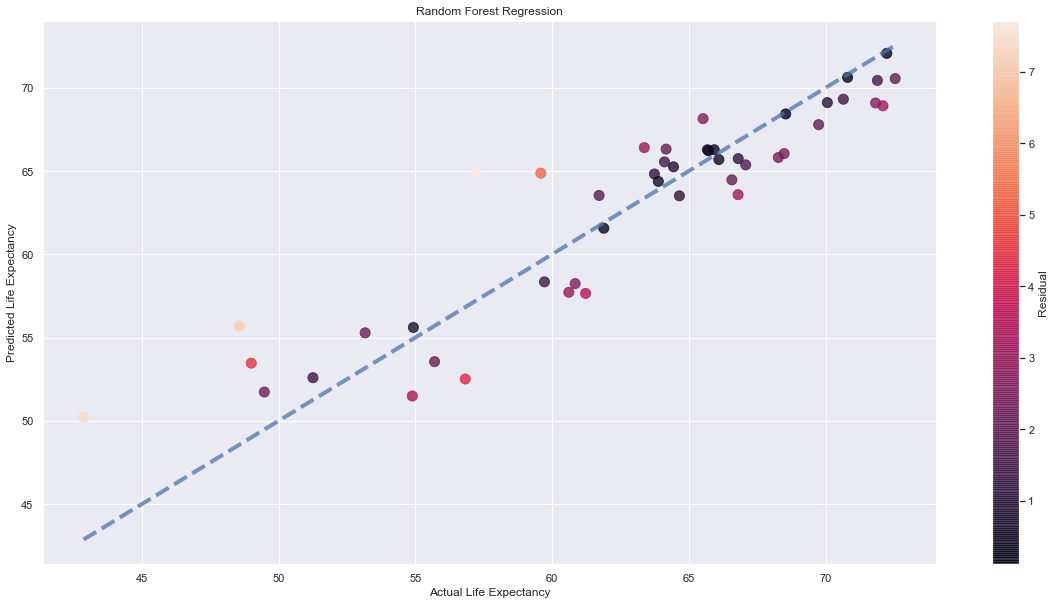

In [68]:
plt_reg(y_test, y_pred, title="Random Forest Regression", axis_label="Life Expectancy")


In [100]:
feat_imp = {key: feat_scores[key] for key in feat_scores if key not in to_inv}
feat_imp = list(OrderedDict(sorted(feat_imp.items(), key=lambda t: t[1], reverse = True)).keys())
feat_imp

['UHC index of essential service coverage',
 'Population using at least basic sanitation services (%)',
 'Population using at least basic drinking-water services (%)',
 'Medical doctors (per 10,000)',
 'Food Safety',
 'Incidence of tuberculosis (per 100 000 population per year)',
 'Mean Non-HDL cholesterol, age-standardized',
 'Poverty Rate',
 '% overweight among adults, BMI &GreaterEqual; 25',
 'Literacy Rate',
 '% underweight among adults, BMI < 18',
 'Current health expenditure (CHE) per capita in US$',
 'Stunting prevalence among children under 5 years of age (%)',
 '% overweight among children and adolescents, BMI > +1 st.d',
 'HIV Rate',
 '% insufficient physical activity among adults 18+',
 'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)',
 '% thinness among children and adolescents, BMI < -2 st.d',
 '% obesity among children and adolescents, BMI > +2 st.d ',
 'Mean systolic blood pressure',
 'Tobacco Use',
 'Concentrations of fine particulate matter 

In [134]:
y = df_filled.iloc[:,0]
features = []
optimal_feat = {}

for i in range (len(feat_imp)):
    features.append(feat_imp[i])
    X = df_filled[features]
   
    X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X,y)
    rf_reg = RandomForestRegressor(n_jobs = -1)
    rf_reg.fit(X_train_scaled, y_train)
    y_pred = rf_reg.predict(X_test_scaled)
    mean_sq_er = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    values = [r2,mean_sq_er]
    optimal_feat[str(features)] = values
print(features)
optimal_feat

['UHC index of essential service coverage', 'Population using at least basic sanitation services (%)', 'Population using at least basic drinking-water services (%)', 'Medical doctors (per 10,000)', 'Food Safety', 'Incidence of tuberculosis (per 100 000 population per year)', 'Mean Non-HDL cholesterol, age-standardized', 'Poverty Rate', '% overweight among adults, BMI &GreaterEqual; 25', 'Literacy Rate', '% underweight among adults, BMI < 18', 'Current health expenditure (CHE) per capita in US$', 'Stunting prevalence among children under 5 years of age (%)', '% overweight among children and adolescents, BMI > +1 st.d', 'HIV Rate', '% insufficient physical activity among adults 18+', 'Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)', '% thinness among children and adolescents, BMI < -2 st.d', '% obesity among children and adolescents, BMI > +2 st.d ', 'Mean systolic blood pressure', 'Tobacco Use', 'Concentrations of fine particulate matter (PM2.5)', 'Unemployme

{"['UHC index of essential service coverage']": [0.6352568060223904,
  4.313710356610592],
 "['UHC index of essential service coverage', 'Population using at least basic sanitation services (%)']": [0.7165331340255815,
  3.802844206692111],
 "['UHC index of essential service coverage', 'Population using at least basic sanitation services (%)', 'Population using at least basic drinking-water services (%)']": [0.7274839114962162,
  3.728665772216115],
 "['UHC index of essential service coverage', 'Population using at least basic sanitation services (%)', 'Population using at least basic drinking-water services (%)', 'Medical doctors (per 10,000)']": [0.7344344426054511,
  3.6808087859737064],
 "['UHC index of essential service coverage', 'Population using at least basic sanitation services (%)', 'Population using at least basic drinking-water services (%)', 'Medical doctors (per 10,000)', 'Food Safety']": [0.7391666300005382,
  3.6478666914679225],
 "['UHC index of essential service cove

In [138]:
import ast
best = OrderedDict(sorted(optimal_feat.items(), key=lambda t: t[1], reverse = True))
items = list(best.items())[0][0]
items

items = ast.literal_eval(items)
df_filled[items].info()
import pickle
with open('feature_importance.pickle', 'wb') as f:
    pickle.dump(_10, f, pickle.HIGHEST_PROTOCOL)

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Data columns (total 15 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   UHC index of essential service coverage                      183 non-null    float64
 1   Population using at least basic sanitation services (%)      183 non-null    float64
 2   Population using at least basic drinking-water services (%)  183 non-null    float64
 3   Medical doctors (per 10,000)                                 183 non-null    float64
 4   Food Safety                                                  183 non-null    float64
 5   Incidence of tuberculosis (per 100 000 population per year)  183 non-null    float64
 6   Mean Non-HDL cholesterol, age-standardized                   183 non-null    float64
 7   Poverty Rate                                                 183 non-n

In [102]:
y = df_filled.iloc[:,0]
X = df_filled[items]
X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X,y)
rf_reg = RandomForestRegressor(n_estimators = 200,n_jobs = -1, oob_score = True)
rf_reg.fit(X_train_scaled, y_train)
y_pred = rf_reg.predict(X_test_scaled)
mean_sq_er = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(r2,mean_sq_er)

0.8101381485366363 3.112262633469426


for col in X.columns.to_list():
    df_mean, df_std = np.mean(df_filled.loc[:,col]), np.std(df_filled.loc[:,col])
    cut_off = df_std*3
    low, upp = df_mean - cut_off, df_mean + cut_off

    df_filled.loc[df_filled[col] < low]=np.nan
    df_filled.loc[df_filled[col] > upp] = np.nan
    
    

df_filled[df_filled.isna()]

df_no_outliers = df_filled.dropna()

y = df_no_outliers.iloc[:,0]
X = df_no_outliers[items] 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
scaler = StandardScaler()
X_train_scaler = scaler.fit(X_train)
X_train_scaled = X_train_scaler.transform(X_train)
X_test_scaled = X_train_scaler.transform(X_test)
rf_reg = RandomForestRegressor(n_jobs = -1)
    
rf_reg.fit(X_train_scaled, y_train)
y_pred = rf_reg.predict(X_test_scaled)
mean_sq_er = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [73]:
df_no_outliers

NameError: name 'df_no_outliers' is not defined

In [74]:
r2,mean_sq_er

(0.8038658124252315, 3.163253761483772)

In [132]:
import ast
features = []
optimal_feat = {}

for i in range (1,len(feat_imp)):
    features.append(feat_imp[i])
    X = df_filled[features]
    y = df_filled.iloc[:,0]
   
    X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X,y)
    lin_reg = LinearRegression().fit(X_train_scaled,y_train )
    lin_reg_score = cross_val_score(lin_reg,X_train_scaled,y_train, cv = 3)
    r2 = lin_reg_score.mean()
    values = r2
    optimal_feat[str(features)] = r2

v=list(optimal_feat.values())
k=list(optimal_feat.keys())
optimal_feat = k[v.index(max(v))]

optimal_feat =ast.literal_eval(optimal_feat)

TypeError: list indices must be integers or slices, not list

In [122]:
X = df_filled.loc[:,optimal_feat]
y = df_filled.iloc[:,0]
X_train_scaled, X_test_scaled, y_train, y_test = split_scale(X,y)
lin_reg = LinearRegression().fit(X_train_scaled,y_train )
lin_reg.score(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²: ", r2_score(y_test, y_pred))

RMSE:  3.04484317989768
R²:  0.8182748256093686


In [107]:
df_filled[optimal_feat]

Population using at least basic sanitation services (%)  \
Country                                                                         
Afghanistan                                                         44.498960   
Angola                                                              48.001210   
Albania                                                             98.270700   
United Arab Emirates                                                98.668585   
Argentina                                                           94.825575   
...                                                                       ...   
Samoa                                                               96.027735   
Yemen, Rep.                                                         51.833300   
South Africa                                                        74.962010   
Zambia                                                              29.937235   
Zimbabwe                                                            37.824920   

                      Population using at least basic drinking-water services (%)  \
Country                                                                             
Afghanistan                                                             65.191400   
Angola                                                                  54.700605   
Albania                                                                 93.923120   
United Arab Emirates                                                    99.971330   
Argentina                                                               98.995225   
...                                                                           ...   
Samoa                                                                   91.452070   
Yemen, Rep.                                                             56.282245   
South Africa                                                            92.086315   
Zambia                                                                  61.752980   
Zimbabwe                                                                64.711945   

                      Medical doctors (per 10,000)  Food Safety  \
Country                                                           
Afghanistan                                 2.8140         20.0   
Angola                                      2.1460         40.0   
Albania                                    12.7280         70.0   
United Arab Emirates                       21.0320        100.0   
Argentina                                  39.9005         80.0   
...                                            ...          ...   
Samoa                                       4.1345        100.0   
Yemen, Rep.                                 5.2510         40.0   
South Africa                                7.6750        100.0   
Zambia                                      0.9250         40.0   
Zimbabwe                                    1.5140         80.0   

                      Incidence of tuberculosis (per 100 000 population per year)  \
Country                                                                             
Afghanistan                                                                189.00   
Angola                                                                     366.00   
Albania                                                                     17.00   
United Arab Emirates                                                         0.98   
Argentina                                                                   27.00   
...                                                                           ...   
Samoa                                                                       12.00   
Yemen, Rep.                                                                 48.00   
South Africa                                                               988.00   
Zambia                                                 

In [78]:
from sklearn.preprocessing import FunctionTransformer
def model_fit(model_name, **model_params):
    model = model_name(**model_params)
    return model.fit(X_train_scaled,y_train)
    #y_pred = model.fit_predict(X_test_scaled)
    #mean_sq_er = np.sqrt(mean_squared_error(y_test, y_pred))
    #r2 = r2_score(y_test, y_pred)
    
model_fitter = FunctionTransformer(model_fit, validate = False, kw_args = {'n_jobs' : -1})
fitter = model_fitter.fit(X,y)


In [79]:
model_fit(RandomForestRegressor,n_jobs = -1, random_state = 42)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [80]:
from sklearn.preprocessing import FunctionTransformer
X = df_filled.iloc[:,1:]

y = df_filled.iloc[:,0]
def split_scale(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    scaler = StandardScaler()
    X_train_scaler = scaler.fit(X_train)
    X_train_scaled = X_train_scaler.transform(X_train)
    X_test_scaled = X_train_scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test
    
scaler_transformer  = FunctionTransformer(split_scale(X,y), validate = False)
scaled = scaler_transformer.fit(X,y)

In [81]:

X = df_filled.loc[:,optimal_feat]
y = df_filled.iloc[:,0]
model_name = RandomForestRegressor
full_pipeline = Pipeline([('train_test_splitter', split_scale(X,y))
                          ])
scores = full_pipeline.fit(X,y)

TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '(array([[ 0.90981176,  0.80968287,  0.42499573, ...,  1.13987687,
        -0.5330508 ,  0.776027  ],
       [-0.06527095, -0.01927348, -0.71762905, ..., -0.94160655,
         1.74236475, -0.62178503],
       [-1.19668645, -0.97343444, -0.84671706, ..., -1.1847705 ,
        -0.59029396, -0.91182718],
       ...,
       [-0.09242028, -0.42244513, -0.82947879, ..., -0.78598162,
        -1.09117159, -0.10567666],
       [-0.74685855, -1.75969039, -0.75957653, ..., -0.33855995,
         0.32559658, -0.58875383],
       [ 0.32863471, -0.1052755 , -0.63361163, ...,  0.24503353,
        -0.00355158, -0.26925533]]), array([[ 8.17772801e-01,  6.06902947e-01,  1.89095289e+00,
         1.39267385e+00, -4.35306031e-01,  2.07677008e-01,
        -1.33135294e+00,  8.44300675e-01,  8.69370873e-01,
        -8.32953912e-01, -3.85108192e-01, -1.38907182e+00,
        -7.07658305e-02, -1.73317699e-01, -1.20691362e+00,
         1.06653917e+00, -7.15207992e-01, -2.21841254e-01,
         1.16993316e+00,  2.48612509e+00],
       [ 8.81260516e-01,  8.02637885e-01,  1.33871589e+00,
        -1.61674969e-01, -7.17472346e-01,  7.68302627e-01,
        -1.04828337e+00,  1.08750956e+00,  8.25800958e-01,
        -9.49994615e-01,  2.62167284e-01, -1.50471727e+00,
         3.73644995e-01, -5.02918693e-01,  4.69258859e-01,
         1.40178964e+00, -7.39930489e-01,  1.57494511e-01,
         2.50699964e-02,  1.88854754e+00],
       [-4.90933719e-01, -1.12119832e+00, -1.02056945e+00,
        -9.38849379e-01,  3.34800017e+00, -1.47419985e+00,
         2.02144885e+00, -8.49577685e-01,  2.48499581e-01,
         5.42274354e-01, -4.28663870e-01,  4.36474126e-01,
        -7.47043174e-01,  2.16645911e+00, -1.50507229e-01,
         5.71282807e-01, -4.77005835e-02, -5.33091111e-01,
         7.54920266e-01, -9.99392705e-01],
       [ 7.52239344e-01,  6.71482923e-01,  2.47224158e-01,
        -1.61674969e-01, -6.50410397e-01,  1.04861544e+00,
        -1.99074663e-01,  8.38578113e-01,  8.14908479e-01,
        -8.32953912e-01, -1.72958903e-01, -1.04213549e+00,
         1.36947925e-01, -5.02139572e-01, -7.97595469e-01,
         1.14273246e+00, -7.39930489e-01, -1.73208463e-01,
         1.11269001e+00,  2.48101561e-01],
       [-1.34181782e+00, -2.15871421e+00, -1.06704848e+00,
        -1.71602379e+00,  9.81852144e-01, -6.33261420e-01,
         1.33369464e+00, -1.30452137e+00, -1.09672155e+00,
         1.15673805e+00, -4.37088513e-01,  7.25587738e-01,
        -9.93401349e-01, -3.35312318e-01, -3.96195300e-01,
        -1.05925354e+00,  4.46749349e-01, -9.90239340e-01,
         1.22717632e+00, -8.67364304e-01],
       [ 4.28748561e-01,  7.61320394e-01,  1.34937116e+00,
         6.15499442e-01, -5.74491209e-01,  1.04861544e+00,
        -2.61979012e-01,  1.05603547e+00, -6.59206987e-01,
        -9.10981047e-01, -2.70475829e-01, -1.12886957e+00,
         4.84747702e-01, -4.92390838e-01,  1.21429846e+00,
         2.20181915e+00, -7.39930489e-01,  3.81205346e-01,
         9.98203689e-01,  1.05954291e+00],
       [ 7.85365502e-01,  7.89112720e-01, -1.15636829e-01,
        -4.20733105e-01, -3.46733645e-01,  1.32892825e+00,
         1.56853754e+00, -3.74605037e-01,  7.27768648e-01,
         1.22878500e-01, -1.44733546e-01, -4.43257292e-01,
         2.57711736e-01, -4.10161765e-01, -1.56377999e-01,
        -1.03639555e+00,  1.25356893e-01,  9.55072271e-01,
        -1.04823922e+00, -1.10073806e+00],
       [-2.31608893e-01,  3.57975372e-01, -8.86735563e-01,
        -9.38849379e-01, -5.87144407e-01,  4.87989818e-01,
         2.04661059e+00,  1.86206042e-01, -1.27290939e-01,
        -6.47639464e-01, -4.63599094e-01,  2.08442171e+00,
         4.79917149e-01, -3.41282365e-01,  6.82334227e-01,
        -5.33519856e-01, -9.12987965e-01,  2.25580417e-01,
        -1.19134712e+00, -9.74528834e-01],
       [ 8.95668311e-01,  6.36714085e-01, -2.65453622e-01,
         6.15499442e-01, -1.69588873e-01,  2.45017948e+00,
        -1.33135294e+00, -4.17524252e-01,  5.37150269e-01,
         3.27699731e-01, -3.72461247e-01, -1.16971931e-01,
         2.19067317e-01, -3.33278063e-01,  8.90949969e-01,
        -9.75440921e-01,  6.93974315e-01,  7.41087994e-01,
         4.97326053e-01, -5.67352958e-01],
       [-1.09617935e+00, -9.12241775e-01, -3.54390438e-01,
        -9.38849379e-01,  4.18311124e+00, -2.31513828e+00,
         1.44272884e+00, -8.38132561e-01, -2.41661966e-01,
         6.69068450e-01, -5.24401384e-01,  1.10556563e+00,
        -8.38823671e-01,  7.79361788e+00, -2.07619537e+00,
        -4.34468583e-01,  3.10775618e-01, -6.98442598e-01,
         5.25947632e-01, -5.58901779e-01],
       [ 5.95903975e-01,  2.61464357e-01, -5.53023480e-01,
        -9.38849379e-01, -3.40407046e-01, -7.26358010e-02,
        -1.42570946e+00, -1.37605339e+00, -1.56337549e-01,
         1.73218817e+00, -5.08118621e-01, -3.64783598e-01,
        -1.06585964e+00, -4.98438180e-01,  1.19040913e-01,
        -8.45912333e-01,  2.54816156e+00, -7.37348830e-01,
        -2.75456585e-01, -7.97921007e-01],
       [ 7.29422785e-01, -5.34239761e-01, -2.66898059e-02,
        -5.50262174e-01, -2.07548467e-01, -9.13574229e-01,
        -2.92329212e-02, -3.97495285e-01,  8.69370873e-01,
        -2.08736826e-01, -5.56487837e-01, -2.61076525e-02,
        -8.29162566e-01, -4.36140829e-01, -1.20382122e-02,
        -7.77338375e-01, -2.94925550e-01, -1.01941901e+00,
         6.11812370e-01, -6.66267296e-01],
       [ 4.13754080e-01,  5.36341172e-01,  3.27715085e-02,
         1.39267385e+00, -1.63262274e-01,  1.18877184e+00,
         5.18034913e-01, -5.12802821e-02,  2.53945820e-01,
        -6.24359470e-02, -4.65272996e-01, -7.57152071e-01,
         1.03134058e-01,  5.16839315e-01, -3.20872516e-01,
         7.92243339e-01,  1.37718141e-01,  2.35306975e-01,
        -2.75456585e-01, -6.68749063e-01],
       [ 9.11030912e-01,  6.68919882e-01,  4.03715805e-01,
        -1.71602379e+00, -2.51834660e-01,  4.87989818e-01,
        -7.96665976e-01, -1.68592804e-01,  8.80263352e-01,
        -3.74544490e-01, -5.23063973e-01, -7.36501099e-01,
        -6.40771020e-01, -4.28580309e-01, -9.11788022e-01,
        -9.22105620e-01, -4.67983026e-01, -8.54067527e-01,
         5.25947632e-01, -4.99665634e-01],
       [ 8.97167639e-01,  8.09682867e-01,  1.30371883e+00,
         1.39267385e+00, -7.14309047e-01,  6.75206037e-02,
        -8.97312934e-01,  6.81207657e-01,  3.46531890e-01,
        -7.64680168e-01,  2.89471365e+00,  4.03432571e-01,
         3.15678366e-01, -4.24580232e-01,  2.41918458e-01,
         1.59227285e+00, -9.87155455e-01, -1.24575673e-01,
        -7.33401852e-01,  4.91882532e-01],
       [ 9.11030912e-01,  8.09682867e-01, -4.97175160e-01,
         1.39267385e+00, -6.56736996e-01,  2.07677008e-01,
        -1.08911763e-01,  9.47306791e-01,  7.44107366e-01,
        -5.11091977e-01,  2.72392369e-02, -1.24038482e+00,
         1.14170284e+00, -4.98112211e-01, -4.73255641e-01,
        -7.69719046e-01,  2.73691873e-01,  1.69429068e+00,
        -7.33401852e-01,  2.48925554e-01],
       [ 9.07732460e-01,  8.06798638e-01,  1.25157536e+00,
         6.15499442e-01, -6.75716793e-01,  2.07677008e-01,
        -3.81497274e-01,  1.10753853e+00,  7.93123521e-01,
        -9.69501399e-01,  8.98586634e-01,  4.03432571e-01,
         1.13687228e+00, -3.35704652e-01,  1.31398666e-01,
         1.47798292e+00, -1.08604544e+00,  5.46556833e-01,
        -1.10548238e+00,  7.40293768e-01],
       [-1.86862859e+00, -8.55434376e-01, -1.01597666e+00,
        -9.38849379e-01,  1.64614504e+00, -1.33404344e+00,
         1.33369464e+00, -1.13570579e+00, -1.09672155e+00,
         1.55662712e+00, -5.55216014e-01,  4.41056532e-02,
        -1.18662345e+00,  1.29611942e+00, -1.77758327e-01,
        -7.01145088e-01,  6.69251819e-01, -1.18477050e+00,
         8.83717372e-01, -8.71340136e-01],
       [ 4.27771727e-01,  2.59206342e-01, -8.27182393e-01,
         6.15499442e-01, -7.25064265e-01,  4.87989818e-01,
        -4.31820753e-01,  3.86495713e-01,  2.64838299e-01,
        -2.37997002e-01, -4.35068613e-01, -1.08343743e+00,
         6.05511513e-01,  7.28233965e-02,  4.29634183e-01,
        -1.98269393e-01, -7.64652986e-01,  7.99447342e-01,
        -4.75807640e-01, -7.26433208e-01],
       [ 8.64605450e-01,  8.09682867e-01,  2.85969467e+00,
         6.15499442e-01, -6.95329250e-01,  1.04861544e+00,
        -8.40699021e-01,  8.84358609e-01,  5.95243489e-01,
        -7.74433560e-01,  2.07361184e+00,  4.03432571e-01,
         7.16614220e-01, -4.14760073e-01,  3.80754223e-01,
         8.22720654e-01, -1.06132295e+00, -7.85697634e-03,
        -1.10548238e+00,  2.34550251e-01],
       [-7.44912974e-01, -4.10647854e-01, -6.47267520e-01,
        -9.38849379e-01,  2.39901032e+00, -3.52948610e-01,
         9.45784485e-01, -1.69079430e+00, -1.15663019e+00,
         2.31739169e+00, -5.36794534e-01,  2.46852980e+00,
        -1.09484295e+00, -2.67327417e-01, -1.02702156e+00,
        -9.83060250e-01,  1.55926170e+00, -8.44340969e-01,
        -1.60970268e-01,  3.30531574e-01],
       [-4.05257780e-01,  1.69591910e-01, -6.22711406e-01,
        -1.71602379e+00,  9.43892550e-01, -3.52948610e-01,
        -9.84277049e-02, -1.61926228e+00, -8.67979498e-01,
         2.30763830e+00, -5.64172959e-01,  1.23773185e+00,
        -1.51027046e+00, -4.19928631e-01, -1.44829379e+00,
        -9.67821593e-01,  2.83247027e+00, -1.23340329e+00,
        -1.89591848e-01, -4.80219803e-01],
       [-2.01271446e+00, -1.63272968e+00, -1.05079000e+00,
        -1.71602379e+00,  1.19062991e+00, -1.47419985e+00,
         1.88934972e+00, -1.30452137e+00, -2.21320063e+00,
         1.01043717e+00, -5.42032964e-01,  9.44488044e-01,
        -1.18179290e+00, -3.22330738e-02, -1.38195883e+00,
        -9.29724949e-01,  7.06335563e-01, -1.07777836e+00,
         1.31304106e+00, -5.33445986e-01],
       [ 8.96436906e-01,  7.96958468e-01,  1.47539730e+00,
         1.39267385e+00, -6.50410397e-01,  4.87989818e-01,
        -1.14263989e+00,  9.33000386e-01,  6.84198733e-01,
        -9.59748007e-01,  7.05895983e-02, -1.56667018e+00,
         1.15619449e+00, -2.21563989e-01, -1.21036091e-01,
         9.29391256e-01, -1.01187795e+00,  1.33440804e+00,
        -6.04604746e-01, -1.61669117e-01],
       [ 7.64009032e-01,  3.86639284e-01,  1.03210126e+00,
         6.15499442e-01, -3.02447452e-01, -7.26358010e-02,
        -1.30619120e+00,  2.66321910e-01,  8.69370873e-01,
        -6.08625897e-01, -4.76246039e-01, -3.52393014e-01,
        -4.13735055e-01, -4.71736616e-01, -1.09497782e-01,
        -9.44963606e-01, -5.17428019e-01, -6.88716040e-01,
         4.54393684e-01,  7.73142555e-01],
       [ 9.11030912e-01,  8.09682867e-01,  7.22486014e-01,
         6.15499442e-01, -7.04819148e-01,  4.87989818e-01,
        -4.18137910e-02,  1.16190287e+00,  1.72252229e-01,
        -9.10981047e-01,  1.61882942e+00,  4.03432571e-01,
         1.58611366e+00, -4.62306317e-01,  1.53245383e+00,
         1.23416440e+00, -1.13549043e+00,  1.52893920e+00,
        -1.26290107e+00, -2.65787963e-01],
       [ 4.47519414e-01,  5.80540540e-01,  1.98409466e+00,
        -1.61674969e-01, -1.25302680e-01, -6.33261420e-01,
        -4.56982493e-01,  4.86640548e-01,  8.47585915e-01,
        -6.08625897e-01, -4.14964677e-01, -1.10821860e+00,
        -3.36446216e-01, -3.80239810e-01, -8.55044376e-01,
         9.14152598e-01, -5.42150516e-01, -3.96919299e-01,
         1.21286553e+00,  1.25791189e+00],
       [ 7.50102561e-01,  5.83737435e-01,  1.65350031e-01,
         6.15499442e-01, -4.98572021e-01,  6.75206037e-02,
        -6.20533800e-01,  4.95224391e-01,  7.98569761e-01,
        -8.32953912e-01, -3.19560803e-01, -9.59531599e-01,
        -2.20512957e-01, -5.14355945e-01, -2.01222793e-01,
        -6.17332472e-01, -5.91595509e-01, -5.62270785e-01,
         1.12700080e+00,  1.07178781e+00],
       [-1.14901034e+00, -5.20273219e-01, -8.87684740e-01,
        -9.38849379e-01,  6.44952897e-02, -1.75451266e+00,
         2.51210277e+00, -9.52583801e-01,  4.88134114e-01,
         4.93507394e-01, -5.25410858e-01, -4.59778070e-01,
        -9.45095825e-01, -5.05792291e-01, -1.25944431e+00,
        -5.33519856e-01,  1.99524383e-01, -9.02700317e-01,
         1.87116185e+00,  3.30531574e-01],
       [-1.49583192e+00, -1.98981274e+00, -1.04044092e+00,
        -1.61674969e-01,  1.53226626e+00, -1.19388704e+00,
         1.21627318e+00, -1.39322108e+00, -1.26010874e+00,
         1.20550501e+00, -5.68590122e-01,  1.69618343e+00,
        -1.00306245e+00,  5.14451319e+00, -2.14769646e+00,
        -9.06866963e-01, -3.19648046e-01, -1.12641115e+00,
         1.84254028e+00, -4.92268960e-01],
       [-3.63042034e-01,  1.45558338e-01, -6.32325645e-01,
        -1.61674969e-01,  6.21236001e-01, -7.26358010e-02,
        -3.06012056e-01, -1.63356868e+00, -5.13973936e-01,
         3.63409960e+00, -5.57063865e-01,  1.33272632e+00,
        -1.57306764e+00, -4.23661936e-01,  4.81958228e-01,
        -8.99247634e-01,  5.49013866e+00, -1.18477050e+00,
        -1.75281058e-01, -1.00232422e+00],
       [ 8.05395776e-01,  4.72555791e-01, -5.68087829e-01,
         6.15499442e-01, -4.28979432e-01,  1.32892825e+00,
         4.55130564e-01,  8.67190923e-01,  8.31247197e-01,
        -7.06159816e-01, -4.86178239e-01, -1.06278646e+00,
         1.05958344e+00, -4.49629213e-01, -1.05395990e+00,
        -4.72565227e-01, -2.45480556e-01,  5.27103717e-01,
         6.83366318e-01, -5.05678225e-01],
       [-2.09124415e+00, -2.38453299e+00, -1.05222908e+00,
        -1.71602379e+00, -1.50609076e-01, -1.47419985e+00,
         8.38847092e-01, -1.58206562e+00, -3.52574433e+00,
         1.57613390e+00, -5.75901681e-01,  2.18354638e+00,
        -1.43781218e+00, -3.99314739e-01, -6.68207359e-01,
        -1.02877622e+00,  1.27495299e+00, -1.30148920e+00,
         2.37203949e+00, -9.65832760e-01],
       [ 3.27396972e-01,  5.78769157e-01,  2.77138527e-01,
         6.15499442e-01, -4.47959229e-01,  7.68302627e-01,
        -2.49398142e-01,  4.98085672e-01,  2.53945820e-01,
        -6.28132681e-01, -4.31096304e-01, -6.24985848e-01,
         7.31105877e-01, -2.53834544e-01, -6.21957316e-01,
        -1.75411407e-01, -8.14097979e-01,  6.04916181e-01,
        -1.44894133e+00, -8.57181732e-01],
       [ 8.75846449e-01,  8.09682867e-01,  2.58180029e+00,
         6.15499442e-01, -7.21900965e-01,  4.87989818e-01,
        -5.57629451e-01,  1.10753853e+00,  7.54999845e-01,
        -9.89008183e-01,  3.42913820e-01, -1.53775882e+00,
         1.39289156e+00, -4.52492223e-01,  1.15470739e+00,
         5.78902135e-01, -1.03660045e+00,  1.11069720e+00,
        -1.32014423e+00,  1.45672137e+00],
       [ 9.07582046e-01,  8.09682867e-01,  1.46232316e+00,
         6.15499442e-01, -7.09880427e-01,  4.87989818e-01,
        -7.65213802e-01,  5.98230508e-01,  8.05831413e-01,
        -7.15913208e-01,  4.77724345e+00,  4.03432571e-01,
        -4.17825158e-02, -4.18403514e-01, -2.01983284e-01,
         1.35607366e+00, -1.11076794e+00, -3.96919299e-01,
        -1.50618449e+00,  7.28924211e-01],
       [ 4.69918116e-01,  5.24358474e-01, -5.04891046e-01,
         6.15499442e-01, -7.11778407e-01, -3.52948610e-01,
        -7.25374381e-01,  3.60744184e-01,  5.06288246e-01,
        -3.45284314e-01, -4.20819057e-01,  4.03432571e-01,
         4.89578254e-01, -2.81139504e-01, -8.26883542e-01,
         8.60817297e-01, -3.44370543e-01,  6.63275529e-01,
        -2.18213427e-01, -7.91781339e-01],
       [-2.55281129e-01, -1.31042516e+00, -8.35143228e-01,
        -1.71602379e+00,  3.36539047e-01, -1.33404344e+00,
         3.14743669e+00, -1.29307624e+00,  6.24290100e-01,
         1.57613390e+00, -4.06746301e-01,  1.96922848e-01,
        -1.20594566e+00,  1.72598211e+00, -5.49624992e-01,
         1.06503755e-01,  9.28838033e-01, -1.12641115e+00,
         8.40785004e-01, -7.06936380e-01],
       [ 6.18252080e-01,  5.52770548e-01, -2.10646334e-01,
        -4.20733105e-01, -7.37717463e-01,  4.87989818e-01,
         3.29321867e-01,  3.45581483e-02,  8.04016000e-01,
        -2.28243610e-01, -3.44609453e-01,  4.03432571e-01,
         2.43220079e-01, -4.40896440e-01, -5.48234777e-03,
         1.49322158e+00, -2.70203053e-01,  3.32572556e-01,
         7.40609476e-01, -9.17144301e-01],
       [ 4.51743415e-01,  3.41818991e-01, -4.76329260e-02,
         1.39267385e+00, -3.40407046e-01, -7.26358010e-02,
        -1.64587468e+00, -8.72467933e-01,  7.05983691e-01,
        -5.26825551e-02, -3.76436408e-01, -1.21560366e+00,
         2.86695051e-01, -4.85484987e-01, -1.28353244e+00,
         2.58890329e-01, -3.19648046e-01,  3.22845998e-01,
        -8.62198959e-01,  1.41277975e+00],
       [-2.01481131e+00, -1.25588724e+00, -1.04365587e+00,
        -9.38849379e-01, -3.72040041e-01, -1.19388704e+00,
         7.38200134e-01, -1.22726678e+00, -2.25677055e+00,
         9.03149857e-01, -5.71387563e-01,  1.01883154e+00,
        -1.13348737e+00, -1.38931361e-01, -1.26234386e+00,
        -8.91628306e-01,  5.82723080e-01, -1.05832525e+00,
         2.11110261e-01, -8.60499609e-01],
       [ 8.92131846e-01,  7.97276423e-01,  3.59043273e-01,
         1.39267385e+00, -7.18737666e-01,  7.68302627e-01,
        -7.58923367e-01,  7.52739683e-01,  8.31247197e-01,
        -8.91474263e-01,  4.85851385e-01,  4.03432571e-01,
         1.01610847e+00, -4.03108807e-01,  1.59267321e+00,
         1.11225514e+00, -9.87155455e-01,  8.18900458e-01,
        -1.01961764e+00,  1.31184218e+00],
       [ 1.96996942e-01,  4.02244385e-01, -1.11135895e-01,
         6.15499442e-01, -4.22652833e-01,  1.32892825e+00,
        -2.93431186e-01,  5.92507946e-01,  6.29736339e-01,
        -6.18379289e-01, -7.29239945e-02, -2.49138153e-01,
         6.29664276e-01,  9.40311201e-02, -2.48305622e-01,
        -6.87408050e-02, -7.39930489e-01,  3.81205346e-01,
        -5.04429219e-01, -8.41577319e-01],
       [ 9.09618150e-01,  7.81390981e-01,  2.83354102e-01,
         1.39267385e+00, -2.51834660e-01,  4.87989818e-01,
        -5.89081625e-01, -8.78190495e-01,  6.98722038e-01,
        -3.16024138e-01,  4.98498330e-01, -1.52949843e+00,
         3.39831128e-01, -4.83922688e-01,  8.29031817e-01,
         3.88418918e-01, -8.88265469e-01,  2.13226978e-02,
        -3.19485766e+00,  9.48460628e-01],
       [ 2.92754793e-01,  5.18085754e-01,  1.12000725e+00,
        -9.38849379e-01,  2.49390930e+00,  2.07677008e-01,
        -2.95527998e-01, -8.23826156e-01,  8.80263352e-01,
         1.91152244e-01, -4.37088513e-01,  1.18449153e-01,
        -8.52574879e-02, -4.56543583e-01, -6.74639733e-01,
        -9.75440921e-01,  2.64669064e-02, -7.59428827e-02,
        -6.76158694e-01,  1.15169149e-01],
       [-2.16820981e+00, -2.16766634e+00, -9.90073327e-01,
        -9.38849379e-01,  7.22461585e-01, -1.47419985e+00,
         2.76372016e+00, -1.52197872e+00, -4.92188979e-01,
         1.83947548e+00, -5.77048034e-01,  1.99355744e+00,
        -1.19145400e+00, -8.50042405e-02, -1.14413817e+00,
        -8.15435018e-01,  5.95084329e-01, -1.22367673e+00,
         9.83892900e-01, -6.13066445e-01]]), Country
Malta          71.389255
Cabo Verde     65.024450
Nigeria        53.853220
St. Lucia      64.972105
Ireland        70.898480
                 ...    
Mexico         65.760080
Bangladesh     64.033845
Lao PDR        59.898760
Yemen, Rep.    58.051150
Morocco        63.582490
Name: Healthy life expectancy (HALE) at birth (years), Length: 137, dtype: float64, Country
Belarus                      65.518710
Czech Republic               68.540405
Eswatini                     48.564025
Montenegro                   66.805515
Somalia                      48.999790
                               ...    
Cyprus                       72.096290
Panama                       68.483855
Korea, Rep.                  72.544735
Korea, Dem. People's Rep.    64.653215
Madagascar                   56.824030
Name: Healthy life expectancy (HALE) at birth (years), Length: 46, dtype: float64)' (type <class 'tuple'>) doesn't